In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
import pprint as pprint 

# File to Load
credits = "data/credits.csv"
titles = "data/titles.csv"

# load information for credits and titles into dataframe 

credits_data = pd.read_csv(credits)
titles_data = pd.read_csv(titles)



In [2]:
# merge data to get titles and credits
mergeData = pd.DataFrame.merge(titles_data,credits_data, how='inner', left_on=['id'], right_on=['id'])
mergeData.head(5)


,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,person_id,name,character,role
0,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,113,"['crime', 'drama']",['US'],NaN,tt0075314,8.3,795222.0,27.612,8.2,3748,Robert De Niro,Travis Bickle,ACTOR
1,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,113,"['crime', 'drama']",['US'],NaN,tt0075314,8.3,795222.0,27.612,8.2,14658,Jodie Foster,Iris Steensma,ACTOR
2,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,113,"['crime', 'drama']",['US'],NaN,tt0075314,8.3,795222.0,27.612,8.2,7064,Albert Brooks,Tom,ACTOR
3,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,113,"['crime', 'drama']",['US'],NaN,tt0075314,8.3,795222.0,27.612,8.2,3739,Harvey Keitel,Matthew 'Sport' Higgins,ACTOR
4,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,113,"['crime', 'drama']",['US'],NaN,tt0075314,8.3,795222.0,27.612,8.2,48933,Cybill Shepherd,Betsy,ACTOR


In [3]:
#get only movies that are designated as comedy
cleanComedyDataDF =mergeData[(mergeData['type']=="MOVIE") & (mergeData.genres.str.contains('comedy', case=False))]
cleanComedyDataDF.head(2)

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,person_id,name,character,role
37,tm127384,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,"['comedy', 'fantasy']",['GB'],NaN,tt0071853,8.2,530877.0,18.216,7.8,11472,Graham Chapman,King Arthur / Voice of God / Middle Head / Hic...,ACTOR
38,tm127384,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,"['comedy', 'fantasy']",['GB'],NaN,tt0071853,8.2,530877.0,18.216,7.8,1549,John Cleese,Second Swallow-Savvy Guard / The Black Knight ...,ACTOR


In [4]:
len(cleanComedyDataDF['title'].unique())

1517

In [5]:
#make a copy of the cleanComdedy dataFrame so we can use it later.
comedy_genre_df=cleanComedyDataDF[['title','release_year','imdb_score','imdb_votes','tmdb_popularity','tmdb_score','production_countries','runtime','name','age_certification']].copy()
#comedyTitlesRatingsDF

In [6]:
comedy_genre_df.drop_duplicates(subset="title", keep='first', inplace=True)
comedy_genre_df.head(10)

,title,release_year,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,production_countries,runtime,name,age_certification
37,Monty Python and the Holy Grail,1975,8.2,530877.0,18.216,7.8,['GB'],91,Graham Chapman,PG
85,Life of Brian,1979,8.0,392419.0,17.505,7.8,['GB'],94,Graham Chapman,R
316,Lupin the Third: The Castle of Cagliostro,1979,7.6,30277.0,14.008,7.5,['JP'],100,Yasuo Yamada,PG
337,Richard Pryor: Live in Concert,1979,8.1,5141.0,4.681,7.5,['US'],78,Richard Pryor,R
392,White Christmas,1954,7.5,42373.0,9.710,7.2,['US'],115,Bing Crosby,NaN
417,Cairo Station,1958,7.5,4385.0,3.556,7.4,['EG'],77,Farid Shawqi,NaN
468,FTA,1972,6.2,411.0,2.466,6.1,['US'],97,Jane Fonda,R
550,No Longer Kids,1979,9.0,943.0,2.733,7.7,['EG'],235,Ahmad Zaki,NaN
569,Dostana,1980,2.1,25.0,3.460,4.9,['IN'],161,Amitabh Bachchan,NaN
632,Lock Your Girls In,1980,NaN,NaN,2.313,8.0,['EG'],230,Fouad El-Mohandes,NaN


In [7]:

comedy_movies_rating = comedy_genre_df.groupby(['title'] ).mean()["imdb_score"]

comedy_movies_rating = comedy_movies_rating.reset_index()
comedy_movies_rating

,title,imdb_score
0,#FriendButMarried,6.9
1,#FriendButMarried 2,6.9
2,#realityhigh,5.2
3,10 jours en or,6.0
4,100 Meters,7.5
...,...,...
1512,Zero,5.2
1513,Zindagi Na Milegi Dobara,8.1
1514,Zip & Zap and the Captain's Island,5.8
1515,Zoolander,6.5


In [8]:

comedy_movies_rating= comedy_movies_rating['title'].count();comedy_movies_rating


1517

In [9]:

movies_age_certification = comedy_genre_df.groupby(['age_certification']).count()['title']
movies_age_certification

age_certification
G         58
NC-17      3
PG       147
PG-13    179
R        167
Name: title, dtype: int64

Text(0, 0.5, 'Number of Comedy Movies')

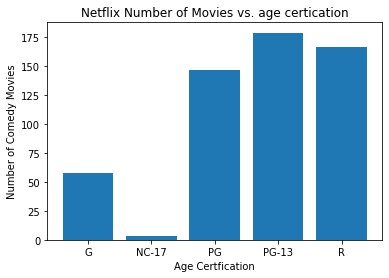

In [10]:
# visualize the distribution of comedy movies according to age certification

plt.bar(movies_age_certification.index, movies_age_certification.values)
plt.title("Netflix Number of Movies vs. age certication")
plt.xlabel("Age Certfication")
plt.ylabel("Number of Comedy Movies")


In [11]:
# visualize the movies based on age certification, IMDB and TMDB scores

movies_age_certification_rating = comedy_genre_df.groupby("age_certification")[["tmdb_score","tmdb_popularity"]].mean() 
movies_age_certification_rating

,tmdb_score,tmdb_popularity
age_certification,,
G,6.431034,13.372586
NC-17,7.200000,8.255667
PG,6.366438,25.168837
PG-13,6.429379,23.177352
R,6.424551,26.198150


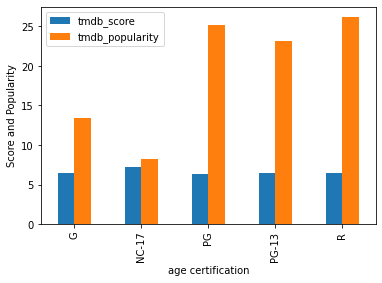

In [12]:
# plot a bar chart to viualize the IMDB and TMDB popularity based age_certification
movies_age_certification_rating. plot(kind="bar")
plt.xlabel("age certification")
plt.ylabel("Score and Popularity")
plt.show()

In [13]:
# run time
bins = [0, 90, 120, 180]
group_names_label = ["0-90 min", "90-120 min", "> 120 min"]

comedy_genre_df["Movie Running Time"] = pd.cut(comedy_genre_df["runtime"], bins, labels =group_names_label, include_lowest = True )
comedy_genre_df.head()

,title,release_year,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,production_countries,runtime,name,age_certification,Movie Running Time
37,Monty Python and the Holy Grail,1975,8.2,530877.0,18.216,7.8,['GB'],91,Graham Chapman,PG,90-120 min
85,Life of Brian,1979,8.0,392419.0,17.505,7.8,['GB'],94,Graham Chapman,R,90-120 min
316,Lupin the Third: The Castle of Cagliostro,1979,7.6,30277.0,14.008,7.5,['JP'],100,Yasuo Yamada,PG,90-120 min
337,Richard Pryor: Live in Concert,1979,8.1,5141.0,4.681,7.5,['US'],78,Richard Pryor,R,0-90 min
392,White Christmas,1954,7.5,42373.0,9.710,7.2,['US'],115,Bing Crosby,NaN,90-120 min


In [14]:
movies_running_quantity = comedy_genre_df.groupby("Movie Running Time").count()["title"]
movies_running_quantity 

Movie Running Time
0-90 min      607
90-120 min    659
> 120 min     242
Name: title, dtype: int64

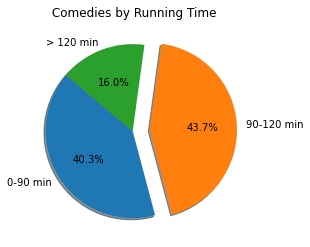

In [15]:
# Comedies per runtime with longest running time exploded

movies_running_quantity.plot(kind ="pie", y= "count" , autopct="%1.1f%%", title = "Comedies by Running Time", shadow = True, startangle = 140, legend =False,explode = [0,0.2,0])
plt.ylabel("")
plt.title(" Comedies by Running Time")
plt.show()

In [16]:

movies_released_per_year = comedy_genre_df.loc[comedy_genre_df["release_year"] >=2010]
movies_released_per_year.head()

,title,release_year,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,production_countries,runtime,name,age_certification,Movie Running Time
4877,The Other Guys,2010,6.6,263019.0,50.290,6.3,['US'],107,Will Ferrell,NaN,90-120 min
4950,How to Train Your Dragon,2010,8.1,719717.0,71.782,7.8,['US'],98,Jay Baruchel,PG,90-120 min
6060,Grown Ups,2010,5.9,247229.0,95.229,6.3,['US'],102,Adam Sandler,PG-13,90-120 min
6563,Shrek Forever After,2010,6.3,200354.0,89.833,6.3,['US'],93,Mike Myers,PG,90-120 min
7983,How Do You Know,2010,5.4,49599.0,11.864,5.3,['US'],121,Reese Witherspoon,PG-13,> 120 min


In [17]:
movies_per_year = movies_released_per_year.groupby("release_year").count()["title"]
movies_per_year

release_year
2010     27
2011     32
2012     40
2013     42
2014     53
2015     66
2016     94
2017    176
2018    197
2019    198
2020    179
2021    158
2022     51
Name: title, dtype: int64

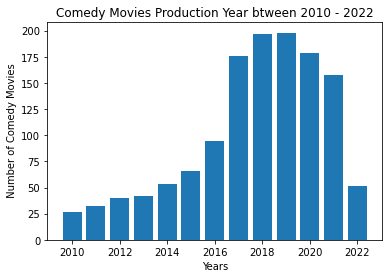

In [18]:
plt.bar(movies_per_year.index.values, movies_per_year.values)
plt.title("Comedy Movies Production Year btween 2010 - 2022")
plt.xlabel("Years")
plt.ylabel(" Number of Comedy Movies")
plt.show()

In [19]:


movies_per_year_rating_popularity = movies_released_per_year.groupby("release_year")[["tmdb_score","tmdb_popularity"]].mean() 

Text(0, 0.5, 'Number of Comedies')

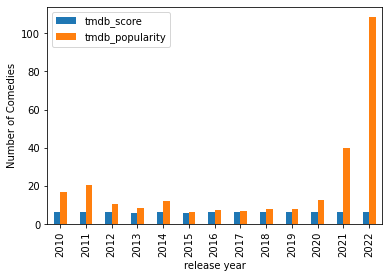

In [20]:
movies_per_year_rating_popularity.plot(kind = "bar")
plt.xlabel("release year")
plt.ylabel("Number of Comedies")

In [21]:
comedyByYear = movies_released_per_year.groupby("release_year").count()["title"]
comedyByYear = comedyByYear.sort_values(ascending = False)
comedyByYear.head()

release_year
2019    198
2018    197
2020    179
2017    176
2021    158
Name: title, dtype: int64

In [22]:
comedyByLocation = movies_released_per_year.groupby("production_countries").count()["title"]
comedyByLocation = comedyByLocation.sort_values(ascending = False)
comedyByLocation.head()

production_countries
['US']    480
['IN']    177
[]         48
['PH']     39
['TR']     38
Name: title, dtype: int64

In [23]:
# Movies that were most popular using TMDb scores
comedyByPopularity = movies_released_per_year.nlargest(5, "tmdb_popularity")
comedyByPopularity

,title,release_year,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,production_countries,runtime,name,age_certification,Movie Running Time
65955,The Adam Project,2022,6.7,156603.0,919.599,7.0,['US'],106,Ryan Reynolds,PG-13,90-120 min
68430,Honeymoon With My Mother,2022,5.8,1503.0,642.372,6.3,['ES'],110,Carmen Machi,NaN,90-120 min
66664,Red Notice,2021,6.3,255356.0,390.768,6.8,['US'],117,Dwayne Johnson,PG-13,90-120 min
73081,Looop Lapeta,2022,5.1,4170.0,356.051,6.3,['IN'],131,Taapsee Pannu,NaN,> 120 min
69182,Through My Window,2022,5.4,7902.0,351.639,7.6,['ES'],116,Clara Galle,R,90-120 min


In [24]:
#top five popular actors
mostPopularActor = movies_released_per_year.groupby(["name"]).count()["title"].sort_values(ascending = False)
mostPopularActor.head()

name
Adam Sandler        12
Jeff Dunham          6
Iliza Shlesinger     5
Vice Ganda           5
Kathryn Bernardo     5
Name: title, dtype: int64

In [25]:
#comedyTitlesRatingsDF.to_csv(r'cleanMovieData.csv', index=False, header=True)
